# Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

Tenemos la tabla games en el conjunto de datos, para usarla y hacer el hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de la tabla y describe los datos que contienen.


- `games.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'Name'`: nombre.
    - `'Platform'`: Plataforma.
    - `'Year_of_release'`: Año de lanzamiento.
    - `'Genre'`: género.
    - `'NA_sales'`: ventas en Norteamérica en millones de dólares estadounidenses.
    - `'EU_sales'`: ventas en Europa en millones de dólares estadounidenses.
    - `'JP_sales'`: ventas en Japón en millones de dólares estadounidenses.
    - `'other_sales'`: ventas en otros países en millones de dólares estadounidenses.
    - `'critic_Score'`: máximo de 100.
    - `'user_score'`: máximo de 10.
    - `'rating'`: ESRB.

# Paso 1. Descripción de los datos

Lee los archivos de datos ('/datasets/games.csv')


1. Leer los archivos de datos
    importar librerías de pandas para crear graficas
    importar librerías de pandas 
    Leer el conjunto de datos utilizamos pd.read_csv    
2. Verificar info del DataFrame 
    utlizamos head() para mostrar información del DataFrame

## Inicialización

In [1]:
import pandas as pd   
from IPython.display import display
import matplotlib.pyplot as plt  
import numpy as np 
import seaborn as sns
from scipy import stats as st
import math as mt

### Cargar datos

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Paso 2. Prepara los datos

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [4]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
new_col_lowered = []

for col in games.columns:
    new_col = col.lower()
    new_col_lowered.append(new_col)
    
games.columns = new_col_lowered
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Convierte los datos en los tipos necesarios.
- Verifica y corrige los tipos de datos con dtype() 
- Identifica y completa valores ausentes con isna() sum()
- Identifica y elimina los valores duplicados duplicated()  

In [5]:
type(games)

pandas.core.frame.DataFrame

In [6]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [7]:
games["user_score"] = pd.to_numeric(games["user_score"], errors='coerce')
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Conclusión
Analisamos los tipos de datos, encontramos datos de objetos en la columna "user_score" y los convertimos a un valor del tipo 
float64 pero pandas no lo permite arrojando el error TBD: significa "to be determined", lo solucionamos utilizando el parámetro errors='coerce' para los valores invalidos se reemplaza por un valor Nan.

In [8]:
# Buscar y contar valores ausentes 
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
# Bucle para reemplazar los valores ausentes con 'unknown'
columns_to_replace = ['name', 'genre']

for col in columns_to_replace:
     games[col].fillna('unknown', inplace=True)
        
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
# Contar duplicados explícitos
games.duplicated().sum()

0

In [11]:
games['name'].unique() # verificamos que los nombres esten bien escritos

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
sorted(games['name'].unique()) #organiza alfabeticamente los datos 

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [13]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Conclusión
- Encontramos valores ausentes en la columna 'name' y 'genre' remplazamos los nombres de los datos con 'Unknown'
- La cantidad de valores en las columnas 'critic_score', 'user_score' y 'rating' son considerablemente altos por lo que decidi dejarlos en blanco.
- Se encuentran valores rellenados con 0 en las columnas 'year_of_release'
- Encontramos datos duplicados 


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [14]:
# Crear nueva columna ´total_sales'
games['total_sales']= games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [15]:
games.head() # verificamos la nueva columna

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [16]:
# Entre el 2006 y el 2011 son los datos mas significativos
games.groupby("year_of_release")["name"].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


<AxesSubplot:title={'center':'Year_of_release'}, xlabel='Years', ylabel='Total_sales'>

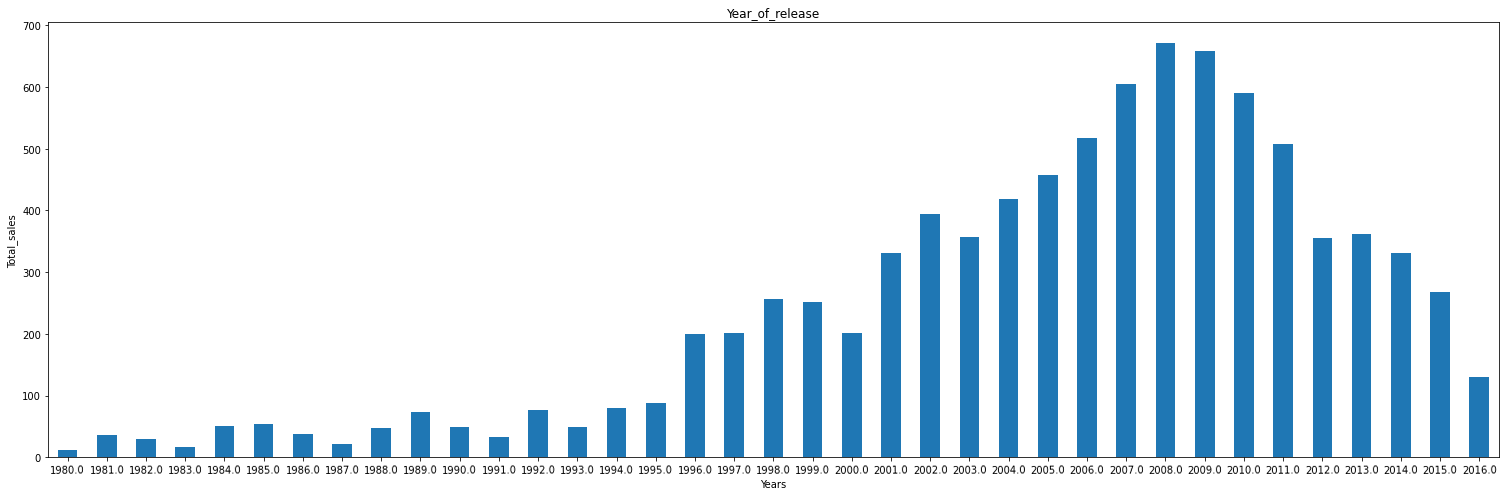

In [17]:
# Cantidad de ventas por diferentes años.
games.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', 
                     rot=1,
                     title = 'Year_of_release',
                     xlabel= 'Years',
                     ylabel= 'Total_sales',
                     figsize= [26, 8])

Conclusión 
Los datos del perido entre 1980 hasta el 1990 no son tan relevantes, no son tantos, son muy antiguos. ya que el existo en ventas es a partir del año 1995 hasta el 2015 donde el punto mas alto de 1427 ventas en el año 2008 es el punto mas importante. 

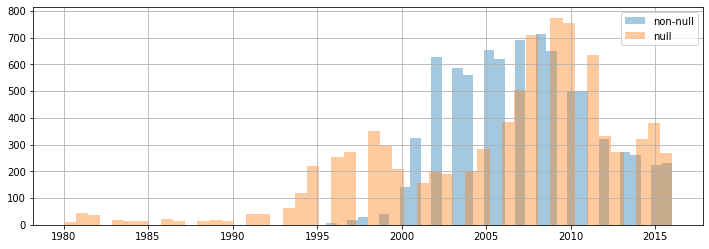

In [18]:
# Relación de los valores nulos y no nulos conrespecto a cada año de juego y su puntaje critico 'critic_score'
games[games["critic_score"].notna()]["year_of_release"].hist(bins=50, label="non-null", alpha=0.4, figsize=(12,4))
games[games["critic_score"].isna()]["year_of_release"].hist(bins=50, label="null", alpha=0.4, figsize=(12,4))
plt.legend()
plt.show()

conlclusiones 
Observamos los valores nulos en la distribución en la columna "critic_score" para los años anteriores al 2000 podemos considerar que en el pasado no existian un "critic_score". Encontramos que en los años despues al 2000 los valores nulos son bastante altos
esto se deba a la consideración de otros analisis.

<AxesSubplot:xlabel='platform'>

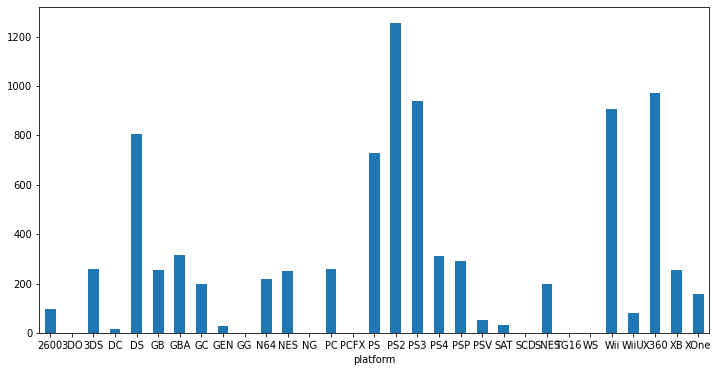

In [19]:
# Como varian las ventas de una plataforma a otra 
games.groupby("platform")["total_sales"].sum().plot(kind="bar", figsize=(12,6), rot= 1)

#### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Las plataformas con mejores ventas son DS, PS, PS2, PS3, Wii, x360.

In [20]:
# Filtramos por plataforma y luego por año 
games.groupby("platform")["total_sales"].sum() # cantidad de ventas por plataforma 

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año

In [21]:
# platform con los 10 video juegos mas populares en ventas
popular_platforms = (
    games
    .groupby(["platform"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

popular_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

<AxesSubplot:xlabel='year_of_release'>

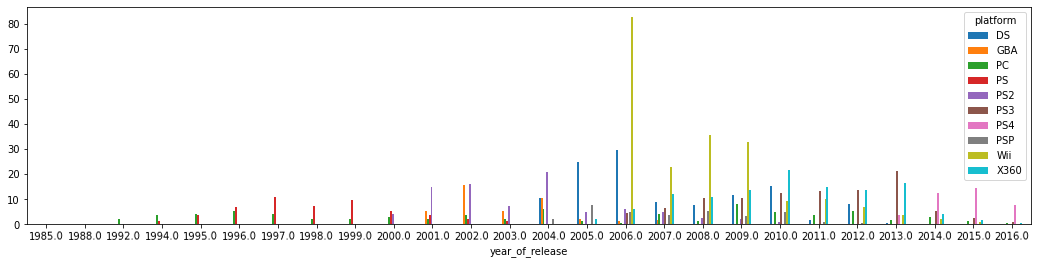

In [22]:
(
    games[games["platform"].isin(popular_platforms)]
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="max")
    .plot(kind="bar", rot=1, figsize=(18,4))
)

Conclusión, de las plataformas mas populares con mayores ventas basada en los datos por año en el 2006 Wii tuvo mayor exito en ventas, seguida por DS y X360 luego seria PS3 y PS4.

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [23]:
# Agrupamos las columnas para obtener el total de ventas por platform


<AxesSubplot:xlabel='year_of_release'>

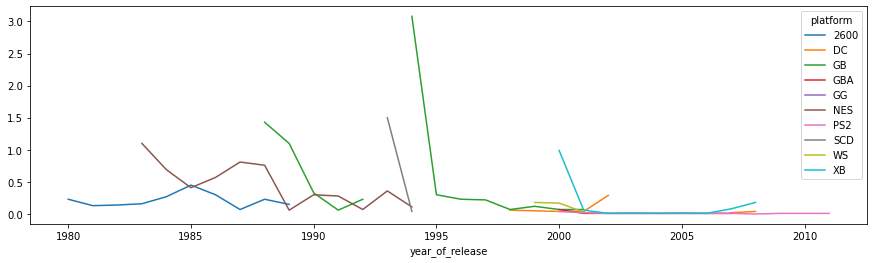

In [24]:
old_platforms = (
    games[games["year_of_release"] <= 2000]
    .groupby(["platform"])["total_sales"]
    .min()
    .sort_values(ascending=False)
    .head(10)
    .index 
)


(
    games[games["platform"].isin(old_platforms)]
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="min")
    .plot(kind="line", figsize=(15,4))
)

Conclusión, de las plataformas que tuvieron en su mejor alza y ahora no son nada populares son GB, Nes, GG y PS2

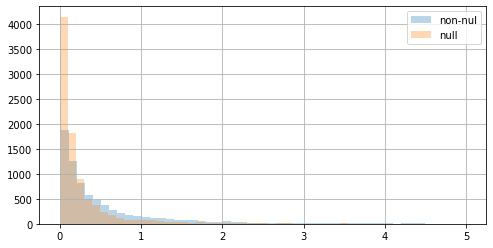

In [25]:
# Enriquece los datos conparando con los valores nulos respecto al 'user_score' y las ventas
games[(games["user_score"].notna()) & (games["total_sales"] < 5)]["total_sales"].hist(bins=50, label="non-nul", alpha=0.3, figsize=(8,4))
games[(games["user_score"].isna()) & (games["total_sales"] < 5)]["total_sales"].hist(bins=50, label="null", alpha=0.3, figsize=(8,4))
plt.legend()
plt.show()

Conclusión, Los video juegos que tienen un "user_score" con valores nulos, tienden a tener menores ventas. 

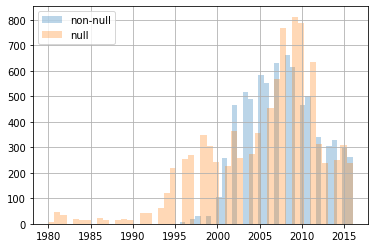

In [26]:
# Enriquece los datos conparando con los valores nulos respecto al 'user_score' y el año 
games[games["user_score"].notna()]["year_of_release"].hist(bins=50, label="non-null", alpha=0.3)
games[games["user_score"].isna()]["year_of_release"].hist(bins=50, label="null", alpha=0.3)
plt.legend()
plt.show()

La relación con los juegos nuevos la mayoria de los juegos que tienen valores nulos son juegos muy recientes. 
Hay muchos valores nulos en juegos antiguos tambien por que en el pasado no era comun tener un "user_score"

#### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos. 

In [27]:
# platform con los 10 video juegos mas populares en ventas
popular_platforms = (
    games
    .groupby(["platform"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index 
)

popular_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

(0.0, 2.0)

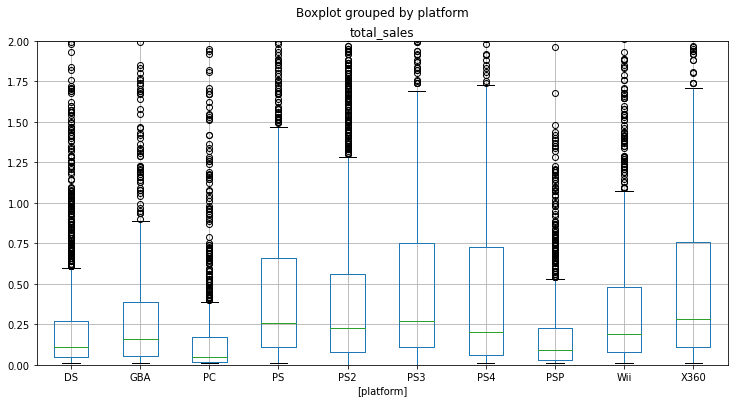

In [28]:
# Diagrama de caja para las ventas mas populares
games[games["platform"].isin(popular_platforms)][["platform", "total_sales"]].boxplot(by="platform", figsize=(12,6))
plt.ylim(0, 2)

Las ventas mas populares se encuentran para plataformas PS4, PS3, PS2, X360

<AxesSubplot:xlabel='year_of_release'>

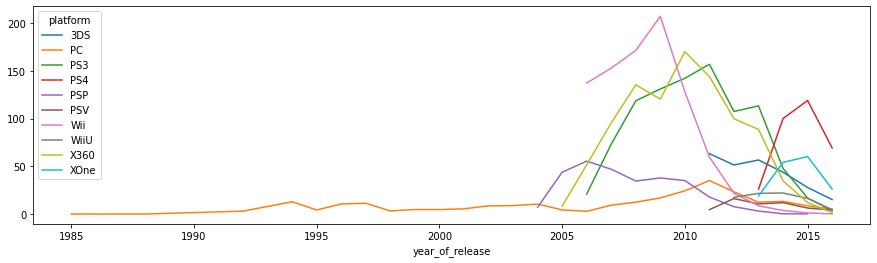

In [29]:
current_platforms = (
    games[games["year_of_release"] >= 2015]
    .groupby(["platform"])["total_sales"]
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index 
)


(
    games[games["platform"].isin(current_platforms)]
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
    .plot(kind="line", figsize=(15,4))
)

Conclusion queremos sacar un video juego para las plataformas Xone y PS4 que son las plataformas que aun estan en vigencia. Las ventas son significativas aun mas notorio para PS4.

#### ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

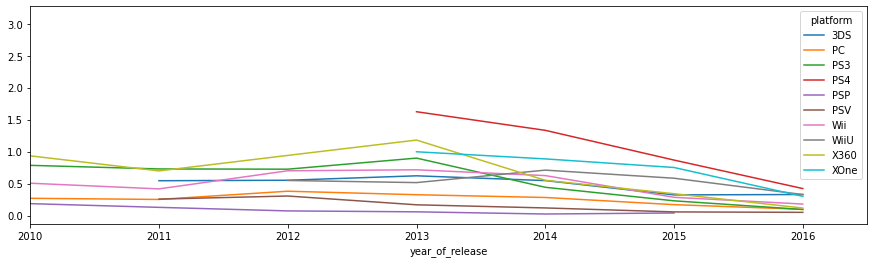

In [30]:
(
    games[games["platform"].isin(current_platforms)]
    .pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="mean")
    .plot(kind="line", figsize=(15,4))
)
plt.xlim(2010, 2016.5)
plt.show()

Esto es lo que vende en promedio un video juego, PS4, Xone, X360 dentro de los que tienen mejor promedio.

#### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [31]:
# Columnas
# user_score
# critic_score
# total_sales
# platform

# Calcula la correlación 
# print(games.corr())

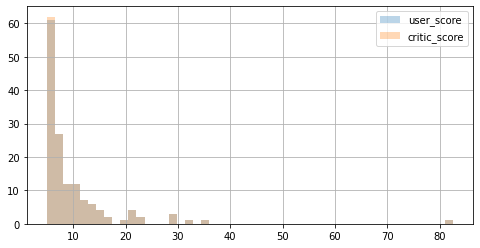

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851,-0.076313
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200,0.941017
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337,0.901240
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598,0.612289
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119,0.749260
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878,0.245507
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000,0.088179
total_sales,-0.076313,0.941017,0.901240,0.612289,0.749260,0.245507,0.088179,1.000000


In [32]:
games[(games["user_score"].notna()) & (games["total_sales"] > 5)]["total_sales"].hist(bins=50, label="user_score", alpha=0.3, figsize=(8,4))
games[(games["critic_score"].notna()) & (games["total_sales"] > 5)]["total_sales"].hist(bins=50, label="critic_score", alpha=0.3, figsize=(8,4))
plt.legend()
plt.show()

games.corr()

Las mejores calificaciónes optienen mayor número de ventas

#### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [33]:
# platform con los 10 video juegos mas populares en ventas
popular_genre = (
    games
    .groupby(["genre"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

popular_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

<AxesSubplot:xlabel='platform'>

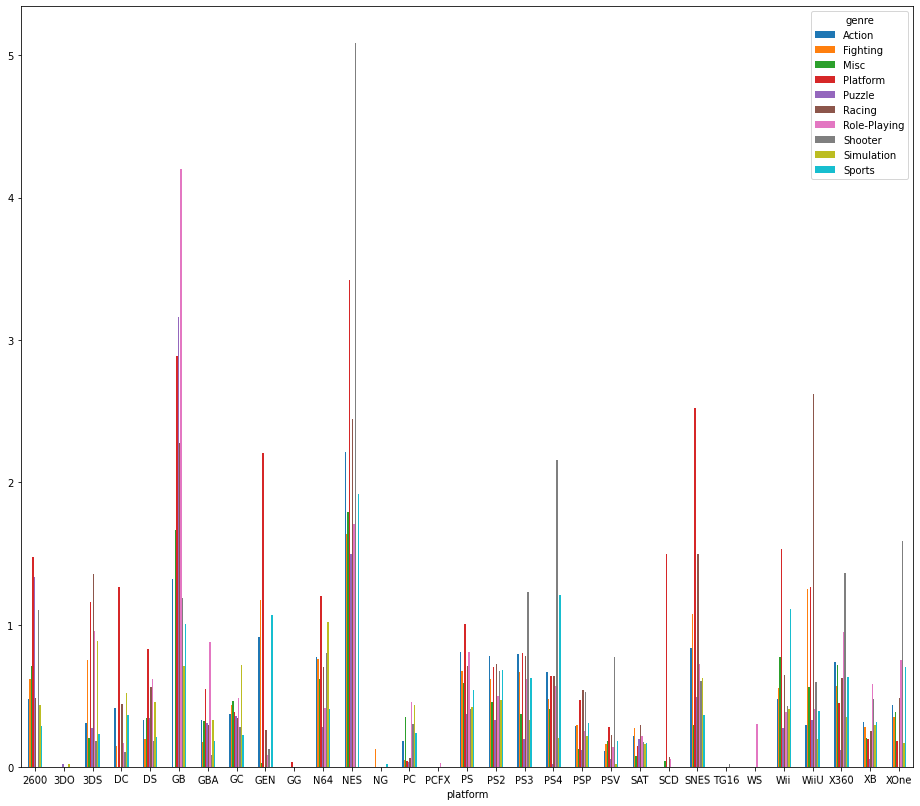

In [34]:
(
    games[games["genre"].isin(popular_genre)]
    .pivot_table(index="platform", columns="genre", values="total_sales", aggfunc="mean")
    .plot(kind="bar", rot=1, figsize=(16,14))
)

Los generos mas rentables son shooter, role_playing, puzzle, con su mayor numero de ventas.

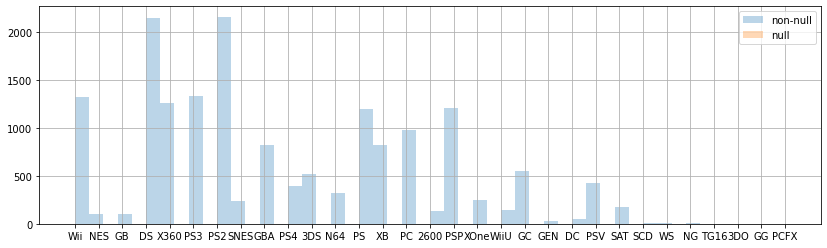

In [35]:
# Enriquece los datos conparando con los valores nulos respecto al 'genre' y la plataforma
games[games["genre"].notna()]["platform"].hist(bins=50, label="non-null", alpha=0.3,  figsize=(14,4))
games[games["genre"].isna()]["platform"].hist(bins=50, label="null", alpha=0.3,  figsize=(14,4))
plt.legend()
plt.show()

# Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [36]:
# Ventas por plataforma en cada región
region = "na"
region_sales = f"{region}_sales"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_plataforms = games.groupby("platform")[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games["platform"].isin(popular_plataforms)].groupby("platform")[region_sales].sum() / games[region_sales].sum()

na


platform
DS      0.086863
PS2     0.132620
PS3     0.089382
Wii     0.112872
X360    0.136852
Name: na_sales, dtype: float64

- La plataforma principal con un 13,68% de ventas totales es para X360 en la región de na_sales

In [37]:
region = "eu"
region_sales = f"{region}_sales"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_plataforms = games.groupby("platform")[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games["platform"].isin(popular_plataforms)].groupby("platform")[region_sales].sum() / games[region_sales].sum()

eu


platform
PS      0.088099
PS2     0.139932
PS3     0.136221
Wii     0.108143
X360    0.111669
Name: eu_sales, dtype: float64

- La plataforma principal con un 13,99% de ventas totales es para PS2 en la región de eu_sales

In [38]:
region = "jp"
region_sales = f"{region}_sales"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_plataforms = games.groupby("platform")[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games["platform"].isin(popular_plataforms)].groupby("platform")[region_sales].sum() / games[region_sales].sum()

jp


platform
3DS     0.077595
DS      0.135328
PS      0.107772
PS2     0.107294
SNES    0.089836
Name: jp_sales, dtype: float64

- La plataforma principal con un 13,53% de ventas totales es para DS en la región de jp_sales

In [39]:
# Ventas por genero en cada región
region = "na"
region_sales = f"{region}_sales"
groupby_col = "genre"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

na


genre
Action      0.199668
Misc        0.092512
Platform    0.101196
Shooter     0.134528
Sports      0.155469
Name: na_sales, dtype: float64

- El genero principal con un 19,96% de ventas totales es para Action en la región de na_sales

In [40]:
region = "eu"
region_sales = f"{region}_sales"
groupby_col = "genre"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

eu


genre
Action     0.214103
Misc       0.087740
Racing     0.097543
Shooter    0.130880
Sports     0.155398
Name: eu_sales, dtype: float64

- El genero principal con un 21,41% de ventas totales es para Action en la región de eu_sales

In [41]:
region = "jp"
region_sales = f"{region}_sales"
groupby_col = "genre"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

jp


genre
Action          0.124429
Misc            0.083330
Platform        0.100842
Role-Playing    0.273947
Sports          0.104473
Name: jp_sales, dtype: float64

- El genero principal con un 27,39% de ventas totales es para Role-Playing en la región de jp_sales

In [42]:
region = "na"
region_sales = f"{region}_sales"
groupby_col = "rating"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

na


rating
E       0.293704
E10+    0.080257
K-A     0.000582
M       0.170018
T       0.172578
Name: na_sales, dtype: float64

- El rating principal con un 29,37% es para E en la región de na_sales

In [43]:
region = "eu"
region_sales = f"{region}_sales"
groupby_col = "rating"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

eu


rating
AO      0.000252
E       0.292926
E10+    0.077751
M       0.199602
T       0.176119
Name: eu_sales, dtype: float64

- El rating principal con un 29,29% es para E en la región de eu_sales

In [44]:
region = "jp"
region_sales = f"{region}_sales"
groupby_col = "rating"

# Almacenamos en una variable las 5 plataformas principales en ventas
popular_category = games.groupby(groupby_col)[region_sales].sum().sort_values(ascending=False).head(5).index

# la cuota de mercado en cada región es decir el porcentaje del total de ventas
# Calculamos para cada plataforma principal las suma de las ventas y presentamos el porcentaje 

print(region)
games[games[groupby_col].isin(popular_category)].groupby(groupby_col)[region_sales].sum() / games[region_sales].sum()

jp


rating
E       0.152701
E10+    0.030986
K-A     0.001125
M       0.049516
T       0.116698
Name: jp_sales, dtype: float64

- El rating principal con un 15,27% es para E en la región de jp_sales

# Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [45]:
# Calificación promedio XOne
score_mean_x = games[games["platform"] == 'XOne']["user_score"].mean()
score_mean_x

6.521428571428572

In [46]:
# Calificación promedio PC
score_mean_pc = games[games["platform"] == 'PC']["user_score"].mean()
score_mean_pc

7.062467532467533

In [47]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

In [48]:
# Buscamos valores ausentes
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

In [49]:
games['rating'] = pd.to_numeric(games["rating"], errors='coerce')

games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating             float64
total_sales        float64
dtype: object

In [50]:
# El resultado de Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC NO son las mismas.
games.query("(platform != 'XOne') and (platform != 'PC')").fillna(0).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,0.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,0.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,0.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0.0,31.38


In [51]:
# Prueba las hipótesis 
# Para las calificaciones promedio de los usuarios para las plataformas Xbox One y PC
from scipy.stats import ttest_ind

alpha = 0.5

# Realiza la prueba t de dos muestras
stat, p_value = ttest_ind(
    games.query("platform == 'XOne'")["user_score"].fillna(0),
    games.query("platform == 'PC'")["user_score"].fillna(0),
    equal_var = False
)

# Rechaza la hipotesis solo si la media muestral es significativamente menor que el valor alpha
print('valor p:', p_value)

if (p_value < alpha):  
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.0005315801015576501
Rechazamos la hipótesis nula


In [52]:
# Prueba las hipótesis

# calculamos el promedio de las calificaciones
print(f"""
{games.query("platform == 'XOne'")["user_score"].mean()} 
{games.query("platform == 'PC'")["user_score"].mean()} 
""")


6.521428571428572 
7.062467532467533 



In [53]:
# Calificación promedio genre
score_mean_action = games[games["genre"] == 'Action']["user_score"].mean()
score_mean_action

7.054043715846995

In [54]:
# Calificación promedio genre
score_mean_sport = games[games["genre"] == 'Sports']["user_score"].mean()
score_mean_sport

6.96119673617407

In [55]:
games['user_score'] = pd.to_numeric(games["user_score"], errors='coerce')
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating             float64
total_sales        float64
dtype: object

In [56]:
#games['genre'] = pd.to_numeric(games["genre"], errors='coerce')
#games.dtypes

In [57]:
# El resultado de Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC NO son las mismas.
games.query("(genre != 'Action') and (genre != 'Sports')").fillna(-10).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-10.0,-10.0,-10.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,-10.0,35.52
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-10.0,-10.0,-10.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-10.0,-10.0,-10.0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,-10.0,29.80


In [58]:
# Prueba las hipótesis 
# Para las calificaciones promedio de los usuarios para las genre Action y Sports

alpha = 0.5

stat, p_value = st.ttest_ind(
    games[games["genre"] == "Action"]["user_score"].fillna(0),
    games[games["genre"] == "Sports"]["user_score"].fillna(0),
    equal_var = False
)
print('valor p:', p_value)
if (p_value < alpha):  
       print('Rechazamos la hipótesis nula')
else:
       print("No podemos rechazar la hipótesis nula")

valor p: 1.1599167086071376e-08
Rechazamos la hipótesis nula


In [59]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'unknown'], dtype=object)

In [60]:
# Prueba las hipótesis

# calculamos el promedio de las calificaciones
print(f"""
{games.query("genre == 'Action'")["user_score"].mean()} 
{games.query("genre == 'Sports'")["user_score"].mean()} 
""")


7.054043715846995 
6.96119673617407 



### CONCLUSIONES: 

- Se verifican los tipos de datos de la tabla DataFrame 'games' para el analisis del proyecto. 
- Limpiamos y analizamos los datos con los que vamos a trabajar en nuestro proyecto.
- Mostramos la distribución de los datos por año para ver los valores de las ventas, encontrar los juegos mas populares y menos populares, se realizar comparaciónes y graficos de las nuevas tendencias para la investigación.
- Realiazamos la prueba de hipotesis (en proceso de revisión).
- Se realizan conclusiones en cada etapa del analisis.
